# Complete Case Analysis - Removing Missing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100 # to find percentage of null values

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

In [6]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]  # columns having less than 5% null values
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
7012,0.897,Full time course,Graduate,2.0,37.0
11793,0.754,Part time course,Masters,11.0,2.0
5864,0.920,Full time course,High School,2.0,40.0
11461,0.740,no_enrollment,Masters,20.0,35.0
19021,0.897,no_enrollment,Masters,14.0,98.0


In [8]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [9]:
len(df[cols].dropna()) / len(df)  # Number of columns left out of 100 after dropping null values

0.8968577095730244

In [10]:
new_df = df[cols].dropna() # new df after dropping null values
df.shape, new_df.shape

((19158, 13), (17182, 5))

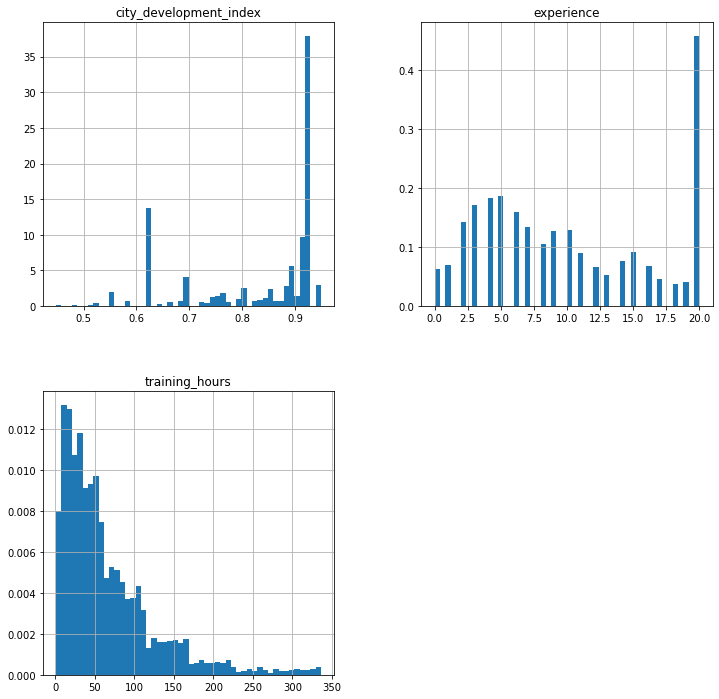

In [11]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

## Visualization of distribution of data of numerical columns after dropping null values

<AxesSubplot:>

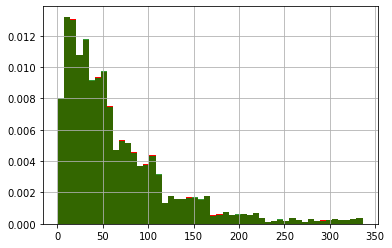

In [12]:
# First looking column 'training_hours'
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:ylabel='Density'>

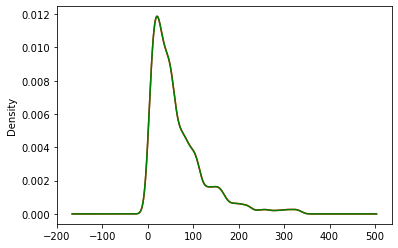

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<b> The above visualizaion shows overlapping between original and after processed data

<AxesSubplot:>

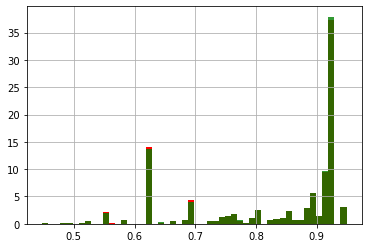

In [14]:
# Visualizing column 'city_development_index'
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

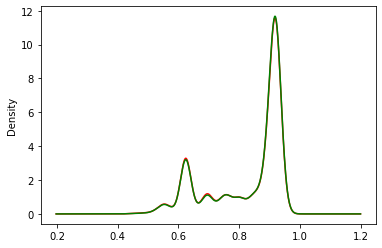

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<b> The above visualization shows no change in distribution of data of column 'city_development_index'

<AxesSubplot:>

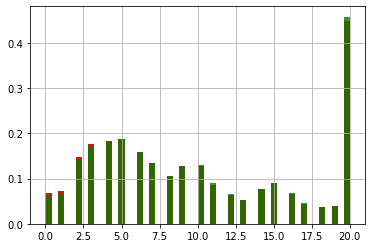

In [16]:
# Visualizing column 'experience'
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

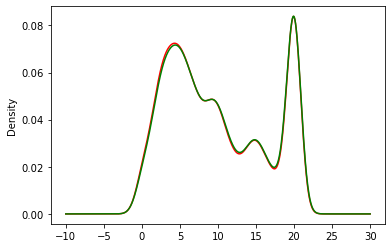

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

## Visualization of categorical columns by checking their ratios

In [18]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [19]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


<b> The above ratio results shows that there is no change in categorical columns. So, dropping less than 5% null rows is good.

# Univarient Imputation

## 1 - Handling Missing Numerical Data

### i - Mean/Median Imputation

<b> We use this technique when data is completely missing at random

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [21]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [23]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [24]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

<b> This shows that Age has 19% and Fare has 5% missing data

In [25]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [27]:
X_train.head()

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0


In [28]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [29]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

### Imputing Missing Data using Pandas

In [30]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

In [31]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

In [32]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean
464,NaN,8.0500,0,28.75,29.785904
0,22.0,7.2500,1,22.00,22.000000
856,45.0,164.8667,2,45.00,45.000000
757,18.0,11.5000,0,18.00,18.000000
341,24.0,263.0000,5,24.00,24.000000


In [33]:
mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [34]:
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [35]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_mean,Fare_median
289,22.0,7.7500,0,22.00,22.000000,7.7500,7.7500
502,NaN,7.6292,0,28.75,29.785904,7.6292,7.6292
135,23.0,15.0458,0,23.00,23.000000,15.0458,15.0458
153,40.5,14.5000,2,40.50,40.500000,14.5000,14.5000
48,NaN,21.6792,2,28.75,29.785904,21.6792,21.6792


### Checking Variance After Mean/Median Imputation 

In [36]:
print('Original Age Variable Variance: ', X_train['Age'].var())
print('Age Variance After Median Imputation: ', X_train['Age_median'].var())
print('Age Variance After Mean Imputation: ', X_train['Age_mean'].var())

Original Age Variable Variance:  204.34951339046142
Age Variance After Median Imputation:  161.98956633460548
Age Variance After Mean Imputation:  161.81262452718676


In [37]:
print('Original Fare Variable Variance: ', X_train['Fare'].var())
print('Fare Variance After Median Imputation: ', X_train['Fare_median'].var())
print('Fare Variance After Mean Imputation: ', X_train['Fare_mean'].var())

Original Fare Variable Variance:  2448.1979137063163
Fare Variance After Median Imputation:  2340.09102197536
Fare Variance After Mean Imputation:  2324.2385256705534


<b> After mean/median imputation distribution will shrink along with variance. But make sure, there should not be a lot shrinkage. The column having more missing values, will have more shrinkage of distribution of data.

### Visualizing Change in Distribution of Data

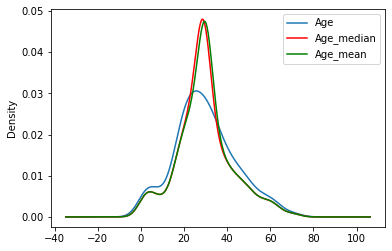

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Age'].plot(kind = 'kde', ax = ax)

# Variable Imputed With The Meidan
X_train['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')

# Variable Imputed With The Mean
X_train['Age_mean'].plot(kind = 'kde', ax = ax, color = 'green')

# Odd Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

<b> The above visualization shows that there is a drastic change in distribution of data after imputation in 'Age' column. Because of mean/median imputaion more data will be distributed around centre

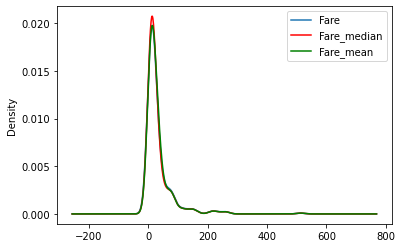

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Fare'].plot(kind = 'kde', ax = ax)

# Variable Imputed With The Meidan
X_train['Fare_median'].plot(kind = 'kde', ax = ax, color = 'red')

# Variable Imputed With The Mean
X_train['Fare_mean'].plot(kind = 'kde', ax = ax, color = 'green')

# Odd Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

<b> The above visualization shows that there is a drastic change in distribution of data after imputation in 'Fare' column.This is fine

In [40]:
# Looking for covariance of imputed columns with remaining columns
X_train.cov() 

,Age,Fare,Family,Age_median,Age_mean,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.385048,16.476305
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,55.023037,53.553455
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2324.238526,2340.091022


In [41]:
# Looking for correlation of imputed columns with remaining columns
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205499,0.205942
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089673,0.086982
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.086078,0.083461
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,0.996607,1.000000


<b> The above results shows that there are drastic change in relation of age column after imputaion with the remaining columns

<AxesSubplot:>

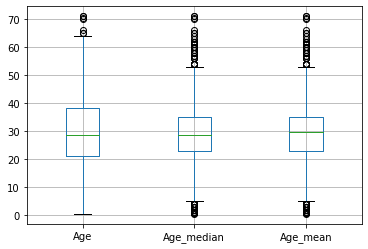

In [42]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<b> The above results show that after imputation in 'Age' column, IQR has shrunk and more outliers have created. This is not good.

<AxesSubplot:>

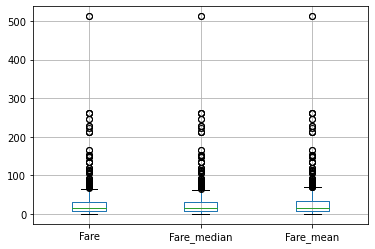

In [43]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

<b> In case of Fare, there are not much changes in IQR and outliers

<b> Thus, the above results show that mean/median imputaion is not good for 'Age' column. Because there are changes in distribution, covariance, and outliers are created.

### Imputing Missing Data Using Sklearn

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =2)

In [45]:
imputer1 = SimpleImputer(strategy = 'mean')
imputer2 = SimpleImputer(strategy = 'median')

In [46]:
trf = ColumnTransformer ([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare']
    )], remainder = 'passthrough')

In [47]:
trf.fit(X_train) # We will fit only training data

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [48]:
trf.named_transformers_['imputer1'].statistics_  # median value of Age

array([29.78590426])

In [49]:
trf.named_transformers_['imputer2'].statistics_  # mean value of Fare

array([14.4583])

In [50]:
# We will transform both training and test data
X_train = trf.transform(X_train)
X_train = trf.transform(X_test)

In [51]:
X_train

array([[ 42.        ,  26.2875    ,   0.        ],
       [ 21.        ,   8.05      ,   0.        ],
       [ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       [ 30.        ,   7.8958    ,   0.        ],
       [ 80.        ,  30.        ,   0.        ],
       [ 25.        ,   7.25      ,   0.        ],
       [ 50.        , 133.65      ,   2.        ],
       [ 25.        ,  26.        ,   1.        ],
       [ 35.        ,  26.        ,   0.        ],
       [ 35.        ,  90.        ,   1.        ],
       [ 55.        ,  16.        ,   0.        ],
       [ 29.78590426,  56.4958    ,   0.        ],
       [ 29.78590426,  56.4958    ,   0.        ],
       [ 19.        ,   7.8542    ,   1.        ],
       [ 29.78590426,  15.2458    ,   2.        ],
       [ 49.        ,   0.        ,   0.        ],
       [ 18.        ,  14.4583    ,   1.        ],
       [ 65.        ,   7.75   

### ii - Arbitrary Value Imputation

<b> We use this technique when data is not missing at random. But this technique is not applied very much.

In [52]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [53]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [54]:
X = df.drop(columns = 'Survived')
y = df['Survived']

In [55]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state =2)

### Imputing Missing Data Using Pandas

In [56]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

In [57]:
X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [58]:
print('Original Age Variable Variance: ', X_train['Age'].var())
print('Age Variance After 99 Imputation: ', X_train['Age_99'].var())
print('Age Variance After -1 Imputation: ', X_train['Age_minus1'].var())

Original Age Variable Variance:  204.34951339046142
Age Variance After 99 Imputation:  951.7275570187188
Age Variance After -1 Imputation:  318.0896202624488


In [59]:
print('Original Fare Variable Variance: ', X_train['Fare'].var())
print('Fare Variance After 999 Imputation: ', X_train['Fare_999'].var())
print('Fare Variance After -1 Imputation: ', X_train['Fare_minus1'].var())

Original Fare Variable Variance:  2448.1979137063163
Fare Variance After 999 Imputation:  47219.202652176304
Fare Variance After -1 Imputation:  2378.5676784883494


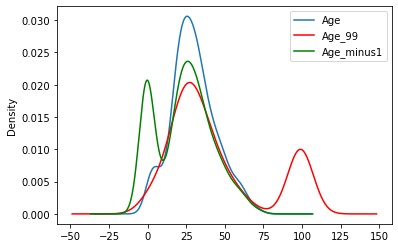

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Age'].plot(kind = 'kde', ax = ax)

# Variable Imputed With The Meidan
X_train['Age_99'].plot(kind = 'kde', ax = ax, color = 'red')

# Variable Imputed With The Mean
X_train['Age_minus1'].plot(kind = 'kde', ax = ax, color = 'green')

# Odd Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

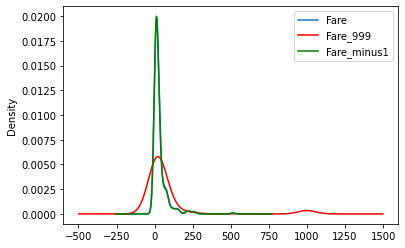

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Fare'].plot(kind = 'kde', ax = ax)

# Variable Imputed With The Meidan
X_train['Fare_999'].plot(kind = 'kde', ax = ax, color = 'red')

# Variable Imputed With The Mean
X_train['Fare_minus1'].plot(kind = 'kde', ax = ax, color = 'green')

# Odd Legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [62]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [63]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


### Imputing Missing Data Using Sklearn

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =2)

In [65]:
imputer1 = SimpleImputer(strategy = 'constant', fill_value = 99)
imputer2 = SimpleImputer(strategy = 'constant', fill_value = 999)

In [66]:
trf = ColumnTransformer ([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])], remainder = 'passthrough')

In [67]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [68]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [69]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [70]:
X_train = trf.transform(X_train)
X_train = trf.transform(X_test)

In [71]:
X_train

array([[4.200000e+01, 2.628750e+01, 0.000000e+00],
       [2.100000e+01, 8.050000e+00, 0.000000e+00],
       [2.400000e+01, 6.500000e+01, 3.000000e+00],
       [2.800000e+01, 5.649580e+01, 0.000000e+00],
       [1.700000e+01, 7.925000e+00, 6.000000e+00],
       [3.000000e+01, 7.895800e+00, 0.000000e+00],
       [8.000000e+01, 3.000000e+01, 0.000000e+00],
       [2.500000e+01, 7.250000e+00, 0.000000e+00],
       [5.000000e+01, 1.336500e+02, 2.000000e+00],
       [2.500000e+01, 2.600000e+01, 1.000000e+00],
       [3.500000e+01, 2.600000e+01, 0.000000e+00],
       [3.500000e+01, 9.000000e+01, 1.000000e+00],
       [5.500000e+01, 1.600000e+01, 0.000000e+00],
       [9.900000e+01, 5.649580e+01, 0.000000e+00],
       [9.900000e+01, 5.649580e+01, 0.000000e+00],
       [1.900000e+01, 7.854200e+00, 1.000000e+00],
       [9.900000e+01, 1.524580e+01, 2.000000e+00],
       [4.900000e+01, 0.000000e+00, 0.000000e+00],
       [1.800000e+01, 9.990000e+02, 1.000000e+00],
       [6.500000e+01, 7.750000e

## 2 - Handling Missing Categorical Data

### i - Most Frequent Value Imputation

In [72]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [73]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [74]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

### Imputing Missing Values Using Pandas

<AxesSubplot:>

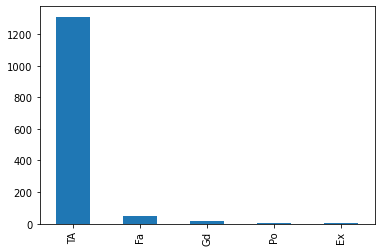

In [75]:
df['GarageQual'].value_counts().plot(kind='bar')

In [76]:
df['GarageQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'GarageQual')

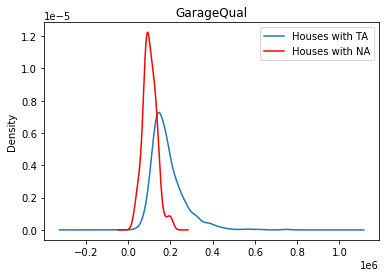

In [77]:
# Plotting pdf for 'SalePrice' where 'GarageQual'== 'TA'
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)  # Plotting pdf for 'SalePrice' where 'GarageQual'== 'TA'

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red') # Plotting pdf for 'SalePrice' where 'GarageQual' is null

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [78]:
temp = df[df['GarageQual']=='TA']['SalePrice'] # Storing values of 'SalePrice' where 'GarageQual'== 'TA' into temp variable 

In [79]:
df['GarageQual'].fillna('TA', inplace=True)  # imputing missing values by 'TA'

<AxesSubplot:>

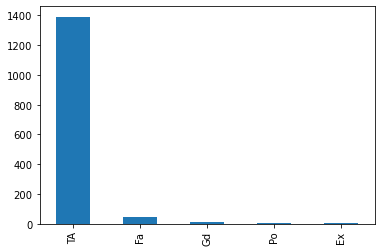

In [80]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

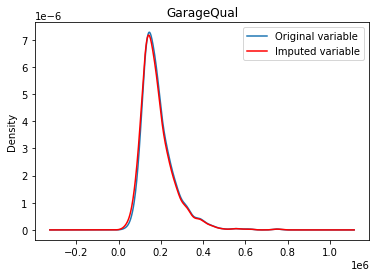

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<b> Now we can see same distribution after imputing with original one since there are less missing values in 'GarageQual

<AxesSubplot:>

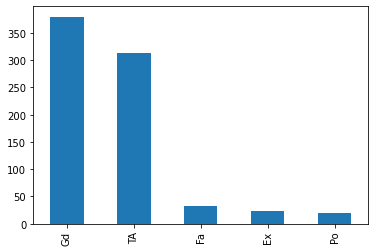

In [82]:
# Working with column 'FireplaceQu'
df['FireplaceQu'].value_counts().plot(kind='bar')

In [83]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'FireplaceQu')

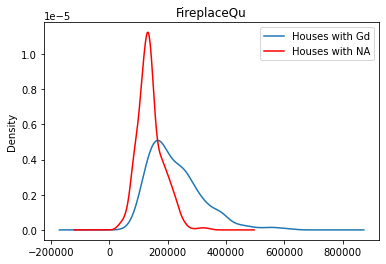

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [85]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [86]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<AxesSubplot:>

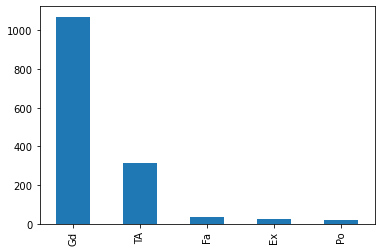

In [87]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

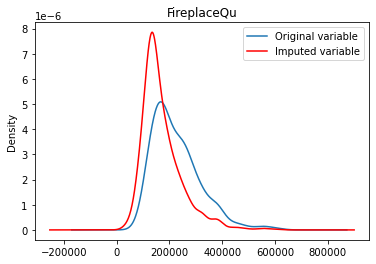

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

<b> The distribution of imputed column 'FireplaceQu' is different from the original one since it has a lot of missing values. So, don't apply frequency imputation on this column 'FireplaceQu

### Imputing Missing Values Using Sklearn

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [90]:
from sklearn.impute import SimpleImputer

In [91]:
imputer = SimpleImputer(strategy='most_frequent')

In [92]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [93]:
imputer.statistics_ # For 1st column 'FireplaceQu', 'Gd' is most frequent category, and for 2nd column 'SalePrice', 'TA' is the most frequent categorty.

array(['Gd', 'TA'], dtype=object)

### ii - Missing Category Imputation

In [94]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,Gd,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [95]:
df.isnull().mean()*100

FireplaceQu    0.0
GarageQual     0.0
SalePrice      0.0
dtype: float64

### Imputing Null Values Using Pandas

Text(0, 0.5, 'Number of houses')

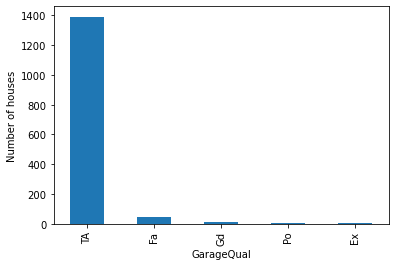

In [96]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [97]:
df['GarageQual'].fillna('Missing', inplace=True) # Replacing null values with word 'Missing'

Text(0, 0.5, 'Number of houses')

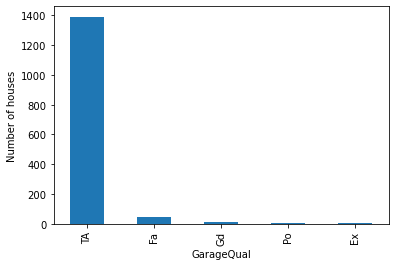

In [98]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

### Imputing Null Values Using Sklearn

In [100]:
from sklearn.impute import SimpleImputer

In [101]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [102]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [103]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

# Random Sample Imputation

<b> Applied both on numerical and categorical data

In [104]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [106]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [107]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [108]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [110]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


### Applying on Numerical Data

In [111]:
# to visualize what changes occur after imputation - so here first store in a form of original columns without imputation
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [112]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [113]:
X_train['Age_imputed']

30     40.0
10      4.0
873    47.0
182     9.0
876    20.0
       ... 
534    30.0
584     NaN
493    71.0
527     NaN
168     NaN
Name: Age_imputed, Length: 712, dtype: float64

In [114]:
X_train['Age_imputed'].isnull().sum()

148

In [115]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] # all null values present in 'Age_imputed' column in X_train

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [116]:
X_train['Age'].isnull().sum()

148

In [117]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values # taking sample of randomly generated 148 values from 'Age' after removing null values

array([ 2.  ,  9.  , 30.  , 49.  , 33.  , 18.  , 28.  , 30.  , 39.  ,
       19.  , 56.  , 31.  , 31.  , 26.  , 47.  ,  9.  , 36.  , 22.  ,
       25.  , 50.  , 64.  , 50.  , 45.  , 29.  , 21.  , 25.  , 11.  ,
       25.  , 16.  , 41.  , 39.  , 19.  ,  4.  ,  8.  , 31.  , 61.  ,
       47.  , 23.  , 28.  , 25.  , 21.  , 27.  , 29.  , 58.  , 36.  ,
       42.  , 18.  , 42.  , 36.5 , 29.  , 31.  , 22.  , 27.  , 30.  ,
       30.  , 30.  , 18.  , 21.  , 22.  , 56.  , 30.  , 17.  ,  4.  ,
       15.  , 57.  , 71.  , 27.  , 18.  , 31.  ,  0.83, 38.  , 35.  ,
        2.  ,  5.  , 29.  ,  8.  , 16.  , 23.  , 32.  , 44.  , 22.  ,
       29.  , 25.  , 24.  , 23.  , 34.5 , 56.  , 14.  , 24.  , 42.  ,
        4.  , 42.  , 29.  ,  4.  , 39.  , 36.  , 21.  , 71.  , 46.  ,
       45.  , 20.  , 35.  , 50.  , 21.  , 45.  , 57.  , 35.  , 26.  ,
       25.  , 39.  , 36.  , 54.  , 22.  , 37.  , 24.  , 14.  , 19.  ,
       28.  , 37.  , 23.  , 24.  , 29.  , 16.  , 30.  , 27.  , 18.  ,
       26.  , 61.  ,

In [118]:
# to replace missing values in 'Age_imputed' column by randomly selecting values from 'Age' column
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [119]:
X_train['Age'].isnull().sum()

148

In [120]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,26.0
493,71.0,49.5042,71.0
527,NaN,221.7792,29.0


C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


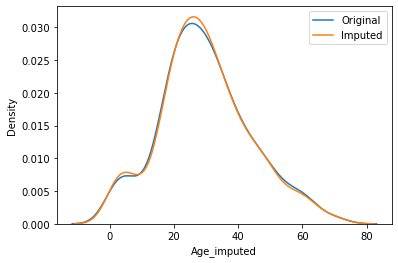

In [121]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [122]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  202.0102801575167


<b> The above results show there is almost same distribution of data and little change in variance in 'Age' column after imputation

In [123]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.481836
Age,71.512440,204.349513,204.349513
Age_imputed,53.481836,204.349513,202.010280


<b> Due to random sample imputation, there is change in covariance of 'Age' column with other columns

<AxesSubplot:>

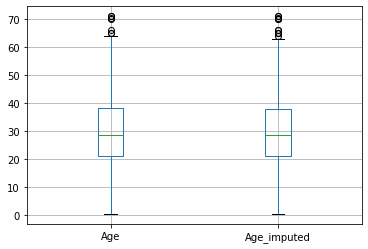

In [124]:
X_train[['Age', 'Age_imputed']].boxplot()

<b> There is also no change in outliers than original one

In [125]:
# During prodution, make sure there is single output when same input is given. Since output changes by creating number. So it is tackled by following:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(['Fare'])) # provide current observation value of Fare to random state

### Applying Random Sample Imputation to Categorical Data

In [126]:
data = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [127]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [128]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [129]:
X = data # provide whole data to X
y = data['SalePrice']

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [131]:
# Adding extra columns in data frame so that we can work on these and visualize with original one
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [132]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
821,NaN,TA,93000,TA,NaN
1166,NaN,TA,245350,TA,NaN
986,NaN,Fa,117000,Fa,NaN
868,TA,TA,169000,TA,TA
1398,NaN,TA,138000,TA,NaN


In [133]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


C:\Users\Admin\AppData\Local\Temp\ipykernel_5828\613679808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\Admin\AppData\Local\Temp\ipykernel_5828\613679808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\Admin\AppData\Local\Temp\ipykernel_5828\613679808.py:4: SettingWithCopyWarning: 
A value

In [134]:
# Checking ratios
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [135]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.010274
Ex,0.000907,0.000856
Po,0.000907,0.000856


<b> The result shows that there is not much difference in ratios since missing values are less

In [136]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.646465
TA,0.412439,0.538721
Fa,0.040917,0.054994
Po,0.027823,0.038159
Ex,0.024550,0.032548


<b> The result shows that there is significant difference in ratios because missing values are about 50%

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

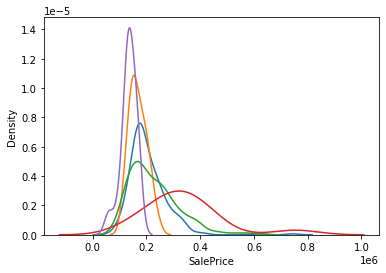

In [137]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

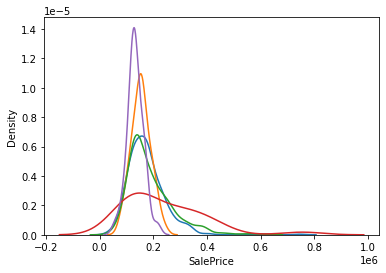

In [138]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

<b> The distribution has changed in 'FireplaceQu' after applying Random Sample Imputer. So not suggested to apply on this column

# Missing Indicator

In [139]:
from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator,SimpleImputer

In [140]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [141]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [142]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [144]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [145]:
# To see what kind of changes occur after applying 'Missing Indicator'

In [146]:
# First impute missing values with mean values
si = SimpleImputer()  # impute missing values by mean values by default
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [147]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [148]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [149]:
# Now apply 'Missing Indicator'
mi = MissingIndicator()

mi.fit(X_train)

MissingIndicator()

In [150]:
mi.features_

array([0], dtype=int64)

In [151]:
X_train_missing = mi.transform(X_train)

In [152]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [153]:
X_test_missing = mi.transform(X_test)

In [154]:
X_test_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [155]:
X_train['Age_NA'] = X_train_missing  # Add these values in original dataset

In [156]:
X_test['Age_NA'] = X_test_missing

In [157]:
X_train

,Age,Fare,Age_NA
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
...,...,...,...
534,30.0,8.6625,False
584,NaN,8.7125,True
493,71.0,49.5042,False
527,NaN,221.7792,True


In [158]:
X_test

,Age,Fare,Age_NA
707,42.0,26.2875,False
37,21.0,8.0500,False
615,24.0,65.0000,False
169,28.0,56.4958,False
68,17.0,7.9250,False
...,...,...,...
89,24.0,8.0500,False
80,22.0,9.0000,False
846,NaN,69.5500,True
870,26.0,7.8958,False


In [159]:
# Imputing missing values in 'Age' column by mean values
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [160]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

<b> Accuracy has improved

### Directly Applying missing indicator without using 'Missing Indicator' class

In [161]:
# Inside SimpleImputer class, if we apply add_indicator =True, then we will not have to apply Missing Indicator class differently. This will work
si = SimpleImputer(add_indicator=True)

In [162]:
X_train = si.fit_transform(X_train)

In [163]:
X_test = si.transform(X_test)

In [164]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

# Automatically Select Imputer Parameters Using GridSearchCV

In [165]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [166]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [167]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [168]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [182]:
df.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [169]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [171]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [172]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [173]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [174]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [175]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [176]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [177]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [178]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [179]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]


,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10,most_frequent,mean,0.787852
9,10,most_frequent,median,0.787852
10,10,constant,mean,0.787852
11,10,constant,median,0.787852
12,100,most_frequent,mean,0.787852
13,100,most_frequent,median,0.787852


# Multivarient Imputation

### 1 - KNN Imputer

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('titanic.csv')[['Age','Pclass','Fare','Survived']]

In [3]:
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [4]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [8]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [9]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [10]:
# Comparision with Simple Imputer --> mean

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [11]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

### 2 - Iterative Imputer

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
df = np.round(pd.read_csv('50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df = df.sample(5)
df

,R&D Spend,Administration,Marketing Spend,Profit
21,8.0,15.0,30.0,11.0
37,4.0,5.0,20.0,9.0
2,15.0,10.0,41.0,19.0
14,12.0,16.0,26.0,13.0
44,2.0,15.0,3.0,7.0


In [14]:
df = df.iloc[:,0:-1]
df

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,4.0,5.0,20.0
2,15.0,10.0,41.0
14,12.0,16.0,26.0
44,2.0,15.0,3.0


In [15]:
df.iloc[1,0] = np.NaN
df.iloc[3,1] = np.NaN
df.iloc[-1,-1] = np.NaN

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [16]:
df.head()

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,NaN,5.0,20.0
2,15.0,10.0,41.0
14,12.0,NaN,26.0
44,2.0,15.0,NaN


In [17]:
# Step 1 - Impute all missing values with mean of respective col

df0 = pd.DataFrame()

df0['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

In [18]:
# 0th Iteration
df0

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,9.25,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [19]:
# Remove the col1 imputed value
df1 = df0.copy()

df1.iloc[1,0] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.25,26.00
44,2.0,15.00,29.25


In [20]:
# Use first 3 rows to build a model and use the last for prediction

X = df1.iloc[[0,2,3,4],1:3]
X

,Administration,Marketing Spend
21,15.00,30.00
2,10.00,41.00
14,11.25,26.00
44,15.00,29.25


In [21]:
y = df1.iloc[[0,2,3,4],0]
y

21     8.0
2     15.0
14    12.0
44     2.0
Name: R&D Spend, dtype: float64

In [22]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.14158651])

In [23]:
df1.iloc[1,0] = 23.14

In [24]:
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [25]:
# Remove the col2 imputed value

df1.iloc[3,1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.0,30.00
37,23.14,5.0,20.00
2,15.00,10.0,41.00
14,12.00,NaN,26.00
44,2.00,15.0,29.25


In [26]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[[0,1,2,4],[0,2]]
X

,R&D Spend,Marketing Spend
21,8.00,30.00
37,23.14,20.00
2,15.00,41.00
44,2.00,29.25


In [27]:
y = df1.iloc[[0,1,2,4],1]
y

21    15.0
37     5.0
2     10.0
44    15.0
Name: Administration, dtype: float64

In [28]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.06331285])

In [29]:
df1.iloc[3,1] = 11.06
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,29.25


In [30]:
# Remove the col3 imputed value
df1.iloc[4,-1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.0
37,23.14,5.00,20.0
2,15.00,10.00,41.0
14,12.00,11.06,26.0
44,2.00,15.00,NaN


In [31]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[0:4,0:2]
X

,R&D Spend,Administration
21,8.00,15.00
37,23.14,5.00
2,15.00,10.00
14,12.00,11.06


In [32]:
y = df1.iloc[0:4,-1]
y

21    30.0
37    20.0
2     41.0
14    26.0
Name: Marketing Spend, dtype: float64

In [33]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.56351448])

In [34]:
df1.iloc[4,-1] = 31.56

In [35]:
# After 1st Iteration
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,31.56


In [36]:
# Subtract 0th iteration from 1st iteration

df1 - df0

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,13.89,0.00,0.00
2,0.00,0.00,0.00
14,0.00,-0.19,0.00
44,0.00,0.00,2.31


In [37]:
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.06,26.00
44,2.0,15.00,31.56


In [38]:
X = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[1,1:].values.reshape(1,2))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.78627207])

In [39]:
df2.iloc[1,0] = 23.78

In [40]:
df2.iloc[3,1] = np.NaN
X = df2.iloc[[0,1,2,4],[0,2]]
y = df2.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.22020174])

In [41]:
df2.iloc[3,1] = 11.22

In [42]:
df2.iloc[4,-1] = np.NaN

X = df2.iloc[0:4,0:2]
y = df2.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[4,0:2].values.reshape(1,2))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38.87979054])

In [43]:
df2.iloc[4,-1] = 31.56
df2

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.78,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.22,26.00
44,2.00,15.00,31.56


In [44]:
df2 - df1

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.0
37,0.64,0.00,0.0
2,0.00,0.00,0.0
14,0.00,0.16,0.0
44,0.00,0.00,0.0


In [45]:
df3 = df2.copy()

df3.iloc[1,0] = np.NaN

df3

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.22,26.00
44,2.0,15.00,31.56


In [46]:
X = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[1,1:].values.reshape(1,2))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.57698058])

In [47]:
df3.iloc[1,0] = 24.57

In [48]:
df3.iloc[3,1] = np.NaN
X = df3.iloc[[0,1,2,4],[0,2]]
y = df3.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.37282844])

In [49]:
df3.iloc[3,1] = 11.37

In [50]:
df3.iloc[4,-1] = np.NaN

X = df3.iloc[0:4,0:2]
y = df3.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[4,0:2].values.reshape(1,2))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.53976417])

In [51]:
df3.iloc[4,-1] = 45.53

In [52]:
df2.iloc[3,1] = 11.22

In [53]:
df3

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,24.57,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.37,26.00
44,2.00,15.00,45.53


In [54]:
df3 - df2

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,0.79,0.00,0.00
2,0.00,0.00,0.00
14,0.00,0.15,0.00
44,0.00,0.00,13.97
